In [1]:
import numpy as np
from matplotlib import pyplot as plt
import emcee
import corner
import chisq_exemple as chisq
import lmfit as fit
import sncosmo
import sncosmo_fit_SNF as SFS
import builtins_SNF as Build_SNF

In [3]:
width = 10
Build_SNF.register_SNf_bands_width(width=width)
Build_SNF.mag_sys_SNF_width(width=width)
Build_SNF.register_SUGAR()  

In [4]:
write_results = False
modelcov = True
t0_free = False
model_used = 'sugar'

SNF20080514-002
initialisation
For the moment no mb for sugar use Mgrey


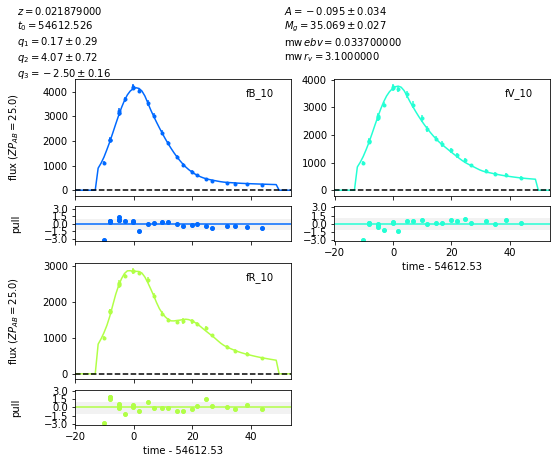

[]
0


In [5]:
res, model,data = SFS.Light_curve_fit(model_used=model_used,width=width, write_results=write_results, modelcov=modelcov, t0_free=t0_free)

In [17]:
def chisq(parameters):
    model.set(t0=parameters[0])
    model.set(q1=parameters[1])
    model.set(q2=parameters[2])
    model.set(q3=parameters[3])
    model.set(A=parameters[4])
    model.set(Mgr=parameters[5])    
    return sncosmo.fitting.chisq(data,model)

def chisq_mcmc(parameters):
    return - chisq(parameters)

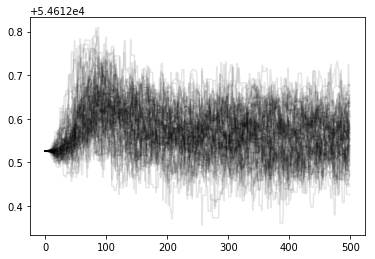

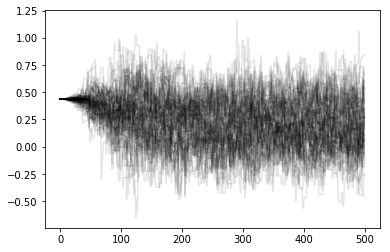

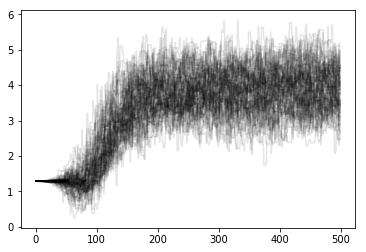

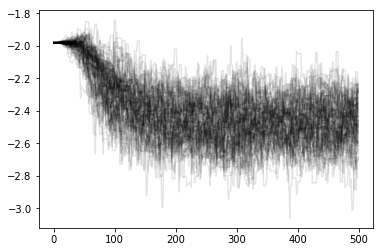

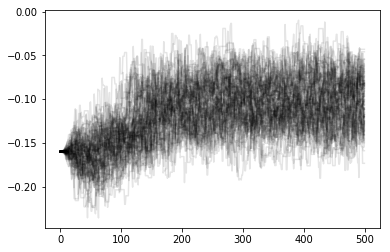

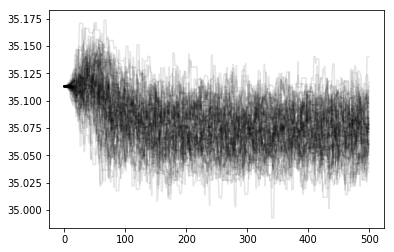

In [18]:
p0 = [54612.526,0.436,1.286,-1.98,-0.160,35.113]
np.random.seed(45)
ndim, nwalkers = 6, 100
pos = [p0 + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, chisq_mcmc)
sampler.run_mcmc(pos, 500)

for j in range(ndim):
    plt.figure()
    for i in range(nwalkers):
        plt.plot(sampler.chain[i,:,j],'k', alpha=0.1)
plt.show()


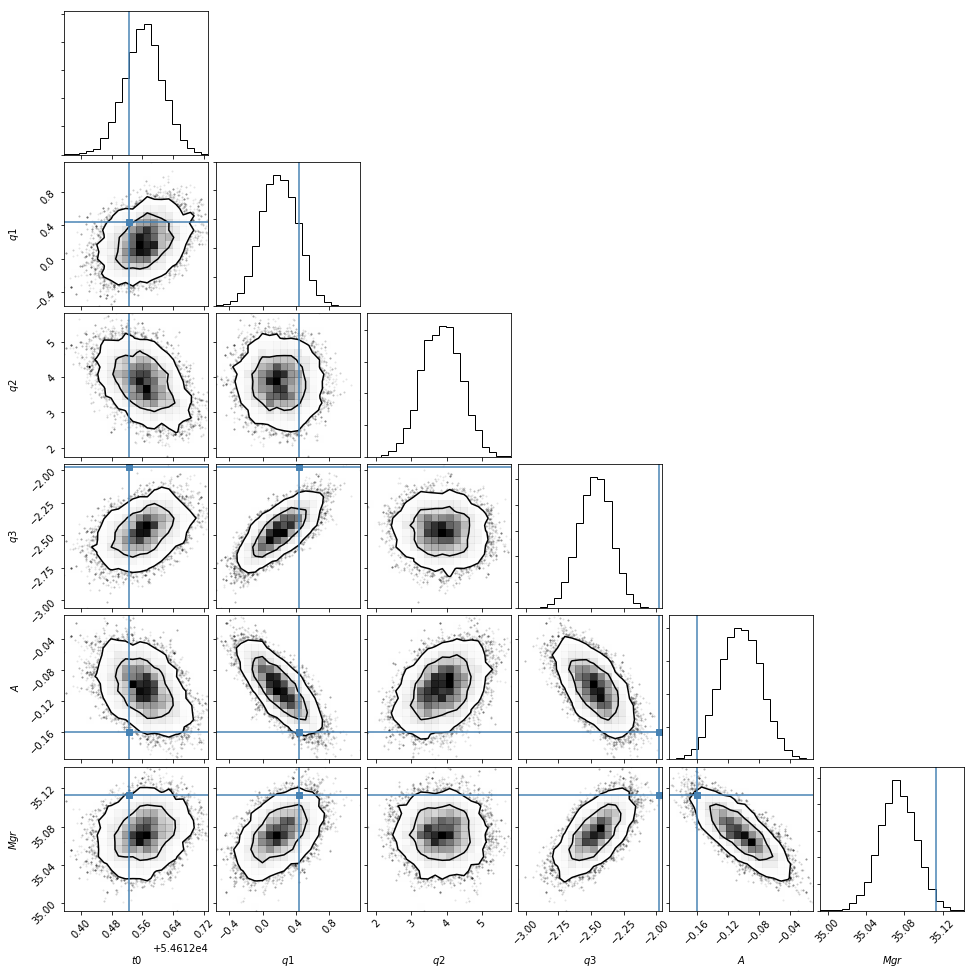

In [19]:
samples = sampler.chain[:, 200:, :].reshape((-1, ndim))
results = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                        zip(*np.percentile(samples, [16, 50, 84],
                                             axis=0)))
import corner
fig = corner.corner(samples, labels=["$t0$","$q1$", "$q2$", "$q3$", "$A$", "$Mgr$"],
                    truths=[54612.526, 0.436,1.286,-1.98,-0.160,35.113], 
                    levels=(0.68, 0.95))
plt.show()

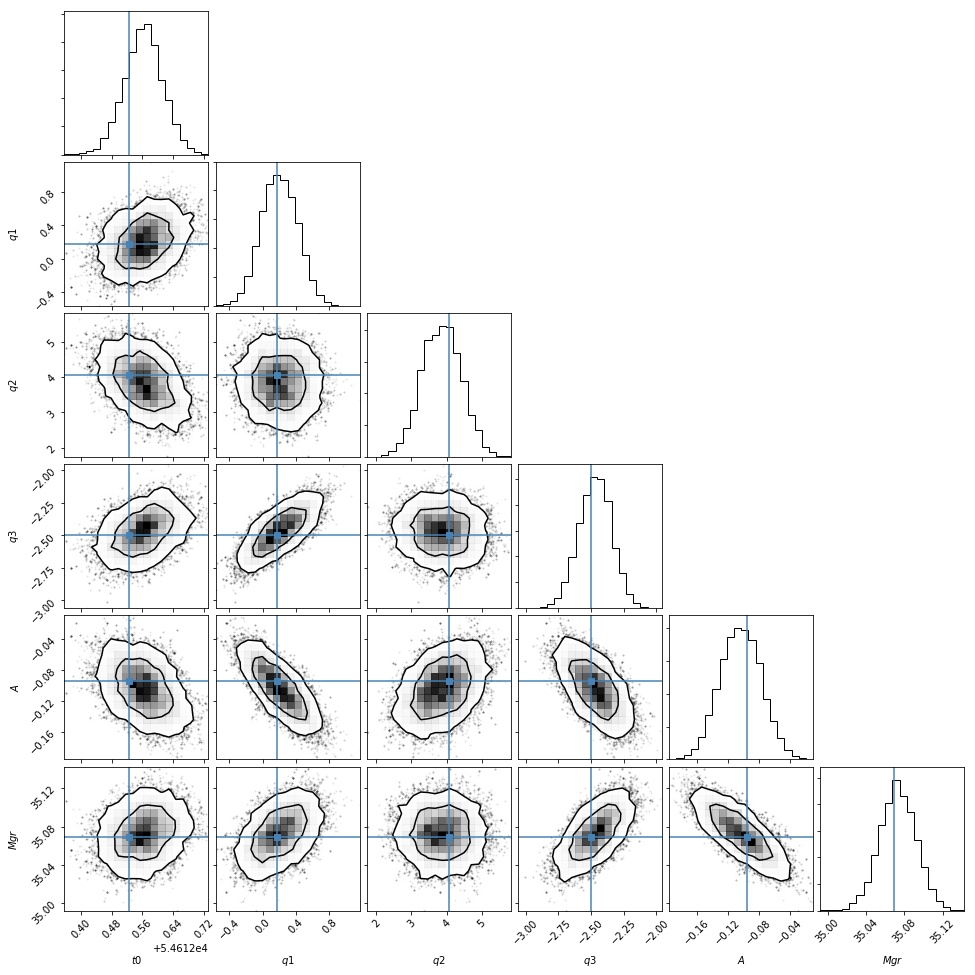

In [22]:
fig = corner.corner(samples, labels=["$t0$","$q1$", "$q2$", "$q3$", "$A$", "$Mgr$"],
                    truths=[54612.526,0.17,4.07,-2.5,-0.095,35.069], 
                    levels=(0.68, 0.95))
plt.show()

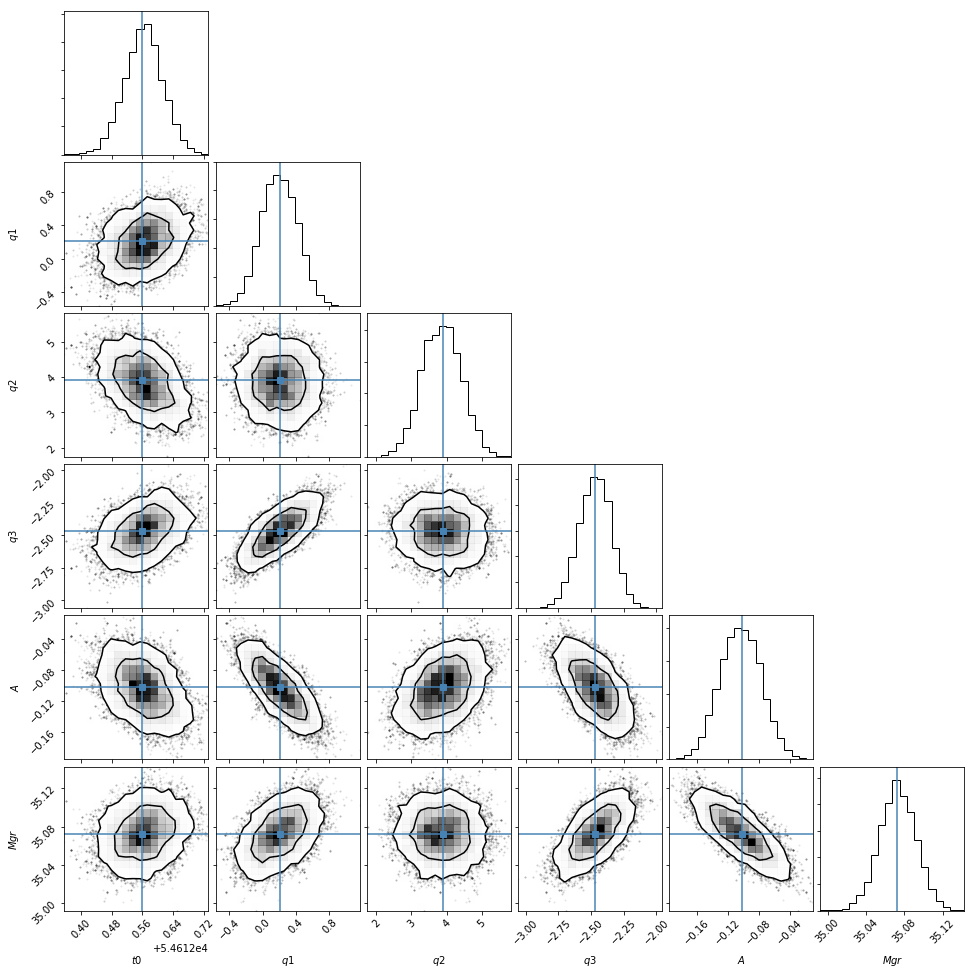

In [23]:
fig = corner.corner(samples, labels=["$t0$","$q1$", "$q2$", "$q3$", "$A$", "$Mgr$"],
                    truths=[54612.558,0.21,3.91,-2.47,-0.102,35.072], 
                    levels=(0.68, 0.95))
plt.show()